# The Sparks foundation tasks 

## Task-1  Prediction using Supervised ML

To Predict the percentage of marks of the students based on the number of hours they studied

By -: Vishist pandey

In [1]:
#importing bunch of libraries to do the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull() == True

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


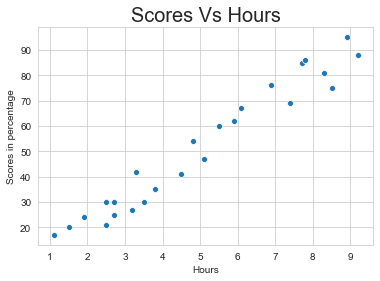

In [9]:
sns.set_style("whitegrid")
sns.scatterplot(y=df["Scores"],x=df["Hours"])
plt.title("Scores Vs Hours",size = 20)
plt.xlabel("Hours",size= 10)
plt.ylabel("Scores in percentage",size =10)
plt.show()

From the above scatter plot it can be seen that the percentage of the student is directly corealted with number of hours of study

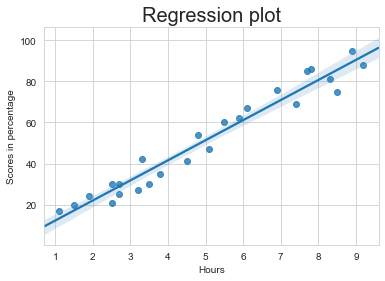

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [16]:
sns.set_style("whitegrid")
sns.regplot(x=df["Hours"],y=df["Scores"])
plt.title("Regression plot",size = 20)
plt.xlabel("Hours",size= 10)
plt.ylabel("Scores in percentage",size =10)
plt.show()
print(df.corr())

From the above plot its is confirmed that the data is positvely correlated

# Training the model

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values
Train_X,Test_X,Train_Y,Test_Y = train_test_split(X,Y,random_state = 0)

Fitting the Trainning the Data into model

In [66]:
reg = LinearRegression()
reg.fit(Train_X,Train_Y)
print("Model Trianed")

Model Trianed


### Predicting the percentage 

In [67]:
pred_y = reg.predict(Test_X)
prediction = pd.DataFrame({"hours":[i[0] for i in Test_X],"Predicted_Scores":[k for k in pred_y]})
prediction

,hours,Predicted_Scores
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [68]:
compare_scores = pd.DataFrame({"Actual_scores":Test_Y,"Predicted_Scores":pred_y})
compare_scores

,Actual_scores,Predicted_Scores
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


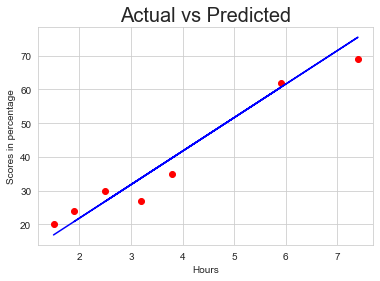

In [69]:
plt.scatter(x=Test_X,y=Test_Y,color = "Red")
plt.plot(Test_X,pred_y,color = "blue")
plt.title("Actual vs Predicted",size = 20)
plt.xlabel("Hours",size= 10)
plt.ylabel("Scores in percentage",size =10)
plt.show()

In [70]:
#calculating the accuracy of the model
print("Mean absolute error",mean_absolute_error(Test_Y,pred_y))

Mean absolute error 4.130879918502486


Since the value is small it means that the chances of error for wrong for prediction is small

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?¶


In [71]:
hours = [9.25]
res = reg.predict([hours])
print("Score = {}".format(res[0]))

Score = 93.89272889341655


### According to the  model generated if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.